In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table 
from astropy.coordinates import SkyCoord
import astropy.units as u
import astropy.constants as const
import matplotlib as mpl
mpl.rcParams['font.family'] = 'stixgeneral'

In [3]:
wlm_coord = SkyCoord(ra='00h01m57.9s', dec='-15d27m50s', unit=(u.hourangle, u.degree), frame='icrs')
wlm_ml = -72.354309
wlm_mb = 1.0100003
wlm_coord.galactic.l.degree, wlm_coord.galactic.b.degree

(75.85320948117584, -73.6257883394147)

In [4]:
# get the MS HI measurement table 
n08ms = Table.read('/Users/Yong/Dropbox/Databucket/Nidever08_MSHI/nidever08_msfinal2.txt', format='ascii')
all_ml = n08ms['MLON']
all_mb = n08ms['MLAT']
all_vlsr = n08ms['VLSR']
all_sigv = n08ms['SIGV']

In [5]:
fox14tb = Table.read('/Users/Yong/Dropbox/Databucket/Fox14_tb1_MS_QSOs.txt', format='ascii')
qso_coords = SkyCoord(l=fox14tb['l'], b=fox14tb['b'], unit=(u.degree, u.degree), frame='galactic')
angu_sep = wlm_coord.separation(qso_coords)
ind30 = angu_sep.degree <= 30
fox14tb[ind30]

ID,Target,Region,l,b,L_MS,B_MS,PID,v_min,v_max,v_MS,logNHI,NHI_tag
int64,str23,str8,float64,float64,float64,float64,int64,int64,int64,float64,float64,int64
1,3C57,MS-Off,173.08,-67.26,-64.05,29.33,12038,-260,-160,nan,17.97,999
17,IRAS01003-2238,MS-Off,152.05,-84.58,-60.56,11.85,12533,-280,-160,nan,18.14,999
20,LBQS0107-0233,MS-Off,134.03,-64.78,-79.13,21.32,11585,-330,-220,-260.0,18.03,999
21,LBQS0107-0235,MS-Off,134.01,-64.8,-79.12,21.3,11585,-340,-150,-252.0,18.02,999
23,MRC2251-178,MS-Off,46.2,-61.33,-74.97,-15.18,12029,-350,-200,-260.0,18.12,999
30,MS0117-2837,CHVC-Off,225.73,-83.65,-53.35,12.53,12204,-270,-95,-120.0,17.29,999
33,NGC7714,MS-On,88.22,-55.56,-91.08,0.43,12604,-420,-190,-320.0,19.01,0
35,PG0026+129,MS-Off,114.64,-49.25,-98.04,16.19,12569,-330,-250,-280.0,18.14,999
36,PG0044+030,MS-Off,120.8,-59.52,-86.78,17.66,12275,-350,-250,-275.0,18.39,999


In [6]:
angu_sep.degree[ind30]

array([29.40701041, 15.94945817, 21.35770131, 21.33703515, 16.39303096,
       22.09129123, 18.73723838, 29.50896234, 21.86576663, 14.52368185,
        2.72390891, 22.84917548,  5.68888996, 28.47127321, 15.06129286,
       22.51220916])

In [7]:
# also read in GBT pointing of the nearby HI detection 
gbt = Table.read('tables/zheng19_wlm_gbt.txt', format='ascii')

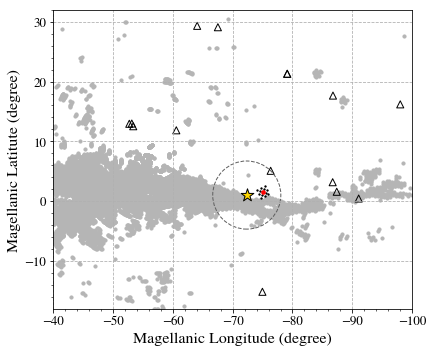

In [8]:
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, aspect=1)
fs = 16
xmin, xmax = -40, -100
ymin, ymax = -18, 32

# first plot the Magellanic Stream sightlines 
lab = np.all([all_ml>=xmax, all_ml<=xmin], axis=0)
ax.scatter(all_ml[lab], all_mb[lab], color=plt.cm.Greys(0.4), s=10, 
           label='Magellanic HI from LAB (Nidever+2008)')

# add WLM 
ax.scatter([wlm_ml], [wlm_mb], marker='*', facecolor='gold', edgecolor='k', s=180, label='WLM')

# GBT 
ax.scatter(gbt['ml'], gbt['mb'], s=7, color='k', marker='.', 
           label='GBT pointings near PHL2525')

# add nearby QSO targets 
for i in range(len(fox14tb[ind30])):
    #if fox14tb[ind30]['ID'][i] == 35: 
    #    continue 
    if fox14tb[ind30]['ID'][i] == 41:
        ax.scatter(fox14tb[ind30]['L_MS'][i], fox14tb[ind30]['B_MS'][i], marker='o', color='r', s=10, linewidth=1.5)
        # ax.text(fox14tb[ind30]['L_MS'][i]-0.5, fox14tb[ind30]['B_MS'][i], fox14tb[ind30]['ID'][i], fontsize=fs-2)
    else: 
        ax.scatter(fox14tb[ind30]['L_MS'][i], fox14tb[ind30]['B_MS'][i], marker='^', edgecolor='k', 
                   facecolor='none', s=50, linewidth=1)
        #ax.text(fox14tb[ind30]['L_MS'][i]-0.5, fox14tb[ind30]['B_MS'][i], fox14tb[ind30]['ID'][i], fontsize=fs-2)

# add virial radius 
cir_1rvir = plt.Circle((wlm_ml, wlm_mb), 5.7, facecolor='none', edgecolor=plt.cm.Greys(.7), linestyle='--')
ax.add_artist(cir_1rvir)

# now plotting stuff 
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
#ax.vlines(wlm_ml, -18, 32, linestyle='--', lw=0.6)
#ax.hlines(wlm_mb, xmin, xmax, linestyle='--', lw=0.6)
ax.grid(linestyle='--')
ax.set_xlabel('Magellanic Longitude (degree)', fontsize=fs)
ax.set_ylabel('Magellanic Latitute (degree)', fontsize=fs)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize=fs-3)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize=fs-3)
ax.minorticks_on()
# ax.legend(loc='lower left')
fig.tight_layout()
fig.savefig('figs/fig_wlm_ms_nearby.pdf')

Now the position velocity diagram 

In [9]:
# get nidever's Gaussian fit velocity 
ml_limit = np.all([all_ml >= -80, all_ml <= -70], axis=0)
mb_limit = np.all([all_mb >= -30, all_mb <= 30], axis=0)

In [10]:
# let's get the centroid velocity and coordinates for the PV diagram
qso_ml = fox14tb[ind30]['L_MS']
qso_mb = fox14tb[ind30]['B_MS']
qso_vc = fox14tb[ind30]['v_MS']

In [11]:
# a velocity gradient line of the Magellanic Stream gas 
xx = np.mgrid[xmin:xmax-1:-1]
dvdl = 7 # km/s/deg
b = 330
yy = dvdl*xx+b

16.3


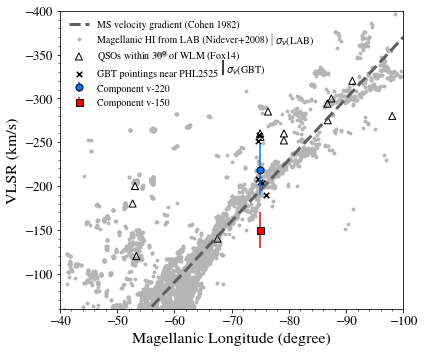

In [147]:
ss = 50
fs = 16

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)

# MS - LAB 
ax.scatter(all_ml[lab], all_vlsr[lab], s=8, color=plt.cm.Greys(0.4), 
           label='Magellanic HI from LAB (Nidever+2008)')
#ax.errorbar(all_ml[lab], all_vlsr[lab], yerr=all_sigv[lab], fmt='.', color=plt.cm.Greys(0.4))

# MS - gradient 
ax.plot(xx, yy, linestyle='--', color=plt.cm.Greys(0.7), linewidth=3, label='MS velocity gradient (Cohen 1982)')

# QSOs 
ax.scatter(qso_ml, qso_vc, marker='^', s=ss, edgecolor='k', linewidth=1, facecolor='none', 
           label=r'QSOs within 30$^{\rm o}$ of WLM (Fox14)')

# GBT 
ax.scatter(gbt['ml'], gbt['vc'], s=ss-20, color='k', marker='x', 
           label='GBT pointings near PHL2525')

# the v-220 component 
ax.errorbar([-75], [-218.8], yerr=[58/2.], fmt='o', color=plt.cm.hsv(0.6), markersize=7, 
            markeredgecolor='k', label='Component v-220')
#ax.scatter([-75], [-218.8], marker='o', color=plt.cm.Blues(0.5), s=ss, edgecolor='k', label='Component v-220')
#ax.vlines(-75, -218.8+58/2., -218.8-58/2., color=plt.cm.Blues(0.5))

# the v-150 component 
ax.errorbar([-75], [-150.2], yerr=[41/2.], fmt='s', color='r', markersize=7, 
            markeredgecolor='k', label='Component v-150')
#ax.scatter([-75], [-150.2], marker='s', color='r', s=ss-10, edgecolor='k', label='Component v-150')
#ax.vlines(-75, -150.2+41/2., -150.2-41/2., color='r')


# plot the error bars :
ax.vlines(-77, -360, -360-np.median(all_sigv[lab]), color=plt.cm.Greys(0.4))
ax.text(-77.5, -363, r'$\sigma_v$(LAB)')

sigv_gbt = np.median([15.5, 17.3, 29.2, 15.5, 12.7, 16.3, 20.5])
print(sigv_gbt)
ax.vlines(-68.5, -327, -327-sigv_gbt, color='k')
ax.text(-69, -330, r'$\sigma_v$(GBT)')

# other plotting stuff
leg = ax.legend(loc='upper left', fontsize=fs-6)
leg.get_frame().set_facecolor('none')
leg.get_frame().set_edgecolor('none')
ax.minorticks_on()
ax.set_xlim(xmin, xmax) # xmin, xmax from the previous plot 
ax.set_ylim(-60, -400)
ax.set_xlabel("Magellanic Longitude (degree)", fontsize=fs)
ax.set_ylabel('VLSR (km/s)', fontsize=fs)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fs-3)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fs-3)
    
fig.tight_layout()
fig.savefig('figs/fig_wlm_ms_pvplot.pdf')

In [148]:
np.median(all_sigv[lab])

14.7806